# Medical Insurance Analysis

In [1]:
%matplotlib inline

# Importing necessary packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pprint import pprint
import seaborn as sns
import sqlite3

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestRegressor as rfr

import warnings
warnings.filterwarnings('ignore')

In [2]:
conn = sqlite3.connect('gtbc_project_4.db')
insurance_df = pd.read_sql_query("SELECT * from gtbc_project_4", conn)
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Exploratory Data Analysis

In [3]:
insurance_df.shape

(1338, 7)

In [4]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
# Checking for null

insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# Checking datatypes

insurance_df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

## Visualization

Text(0.5, 1.0, 'Distribution of Charges')

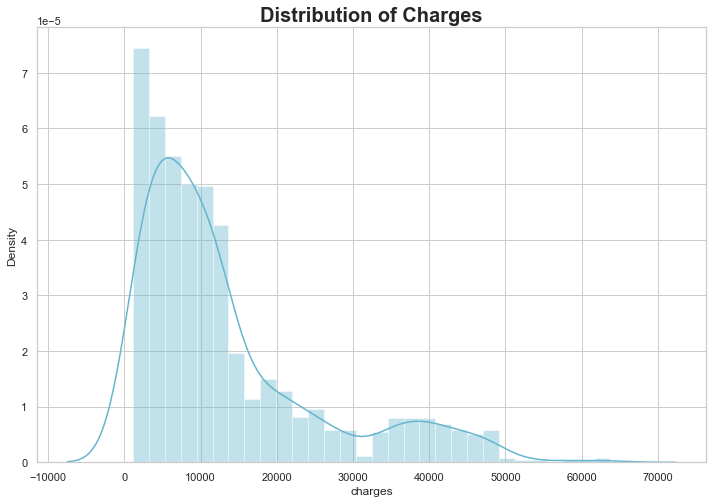

In [7]:
# Distribution of Medical charges

sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(insurance_df['charges'], kde = True, color = 'c')
plt.title('Distribution of Charges',fontweight="bold", size=20)

Text(0.5, 1.0, 'Charges by Region')

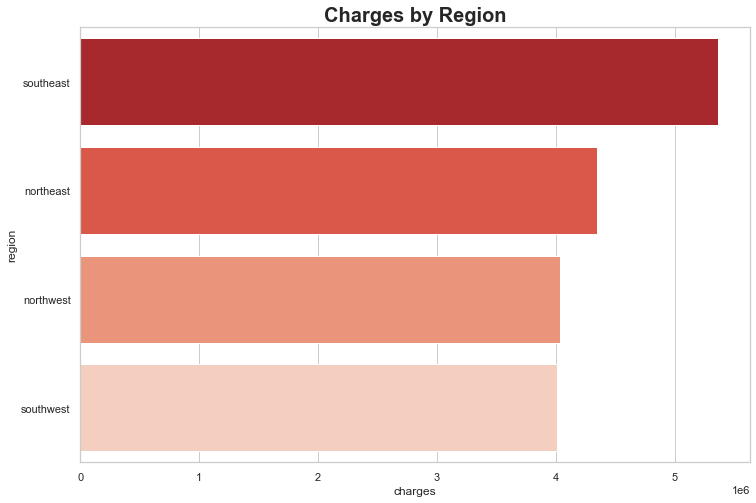

In [8]:
# Charges by region

charges = insurance_df['charges'].groupby(insurance_df.region).sum().sort_values(ascending = False)
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(charges.head(), charges.head().index, palette='Reds_r')
plt.title('Charges by Region',fontweight="bold", size=20)

Text(0.5, 1.0, 'Charges by Smoking')

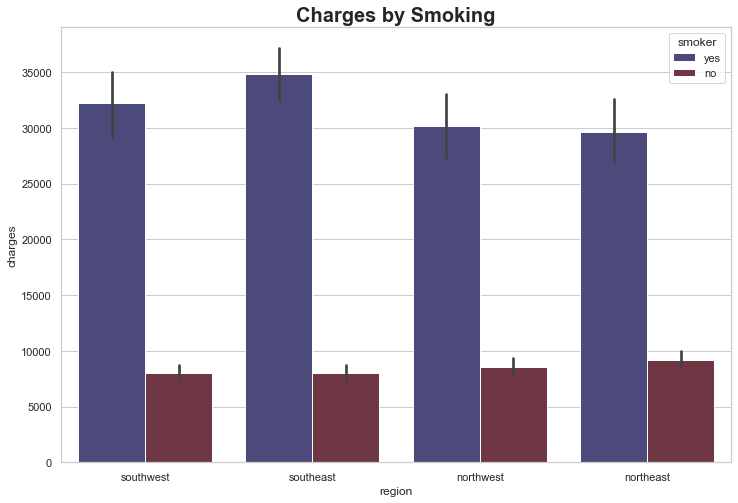

In [9]:
# Charges by Smoking

f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=insurance_df, palette='icefire')
plt.title('Charges by Smoking',fontweight="bold", size=20)

Text(0.5, 1.0, 'Charges by Sex')

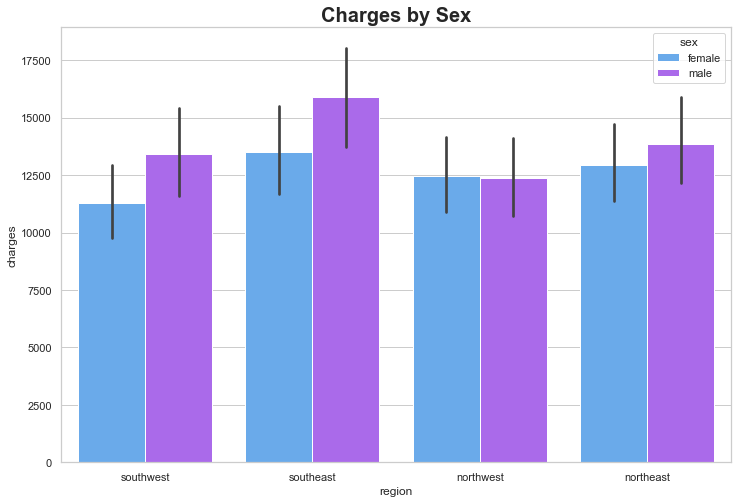

In [10]:
# Charges by Sex

f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=insurance_df, palette='cool')
plt.title('Charges by Sex',fontweight="bold", size=20)

In [11]:
#Binning the age column

bins = [17,35,55,200]
slots = ['Young adult','Senior Adult','Elder']
df1 = insurance_df.copy()
df1['Age_range']=pd.cut(df1['age'],bins=bins,labels=slots)

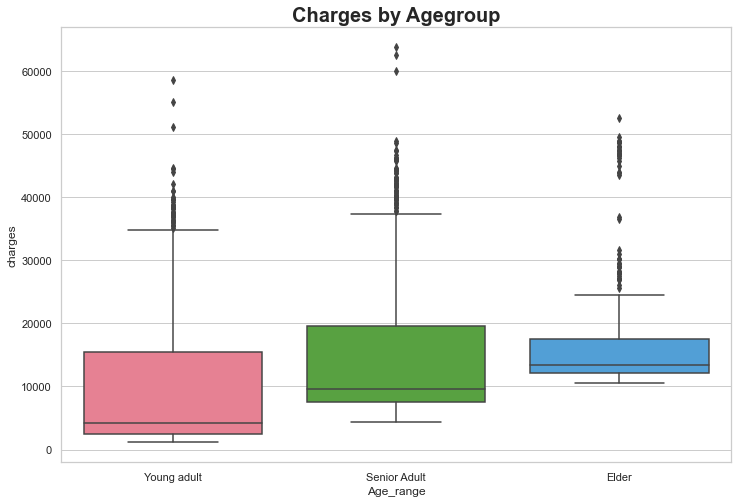

In [12]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.boxplot(x = 'Age_range', y = 'charges', data = df1, palette= 'husl')
plt.title('Charges by Agegroup',fontweight="bold", size=20)
plt.show()

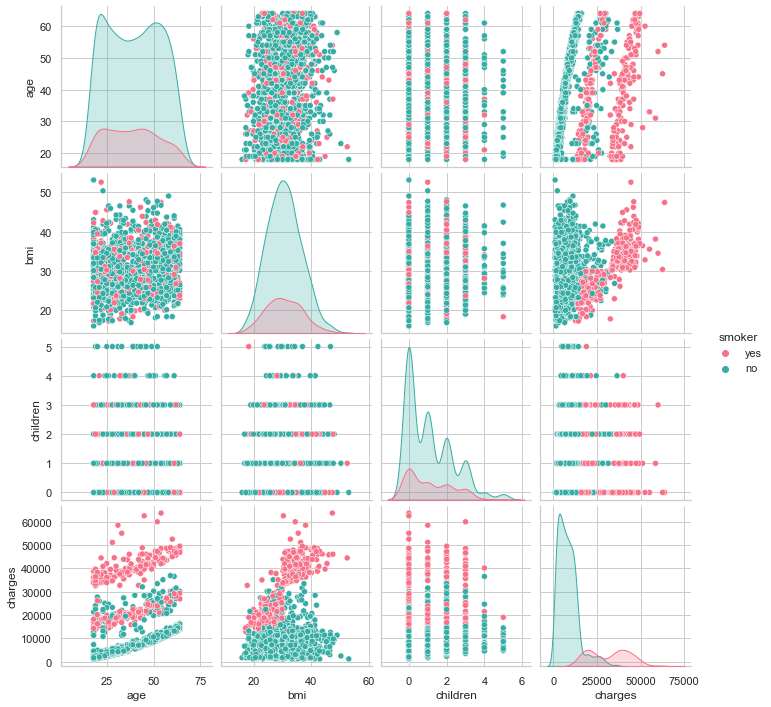

In [13]:
#Pairplot of all numerical variables

sns.pairplot(insurance_df, vars=["age", 'bmi','children','charges'],hue='smoker',palette="husl")
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df1.sex.drop_duplicates())
df1.sex = label.transform(df1.sex)
label.fit(df1.smoker.drop_duplicates())
df1.smoker = label.transform(df1.smoker)
label.fit(df1.region.drop_duplicates())
df1.region = label.transform(df1.region)
df1.drop('Age_range', axis=1, inplace= True)
df1.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region        int64
charges     float64
dtype: object

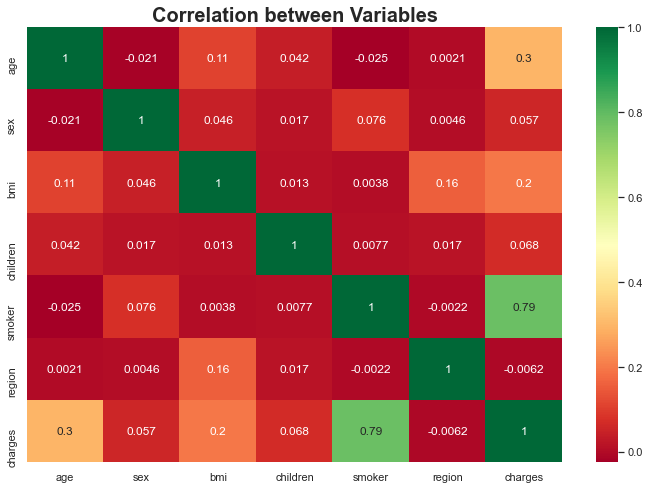

In [15]:
# Heat Map

plt.figure(figsize=(12, 8))
sns.heatmap(df1.corr(), cmap='RdYlGn', annot = True)
plt.title("Correlation between Variables",fontweight="bold", size=20)
plt.show()

## Scaling the data

In [16]:
X = insurance_df.drop(['charges'], axis = 1)
y = insurance_df['charges']

In [17]:
X=pd.get_dummies(X,drop_first=True)
X.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [18]:
X.columns

Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=18)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

age


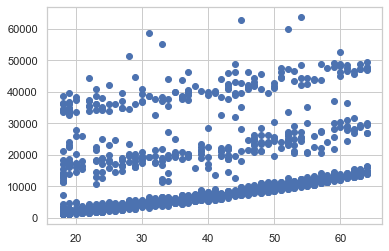

bmi


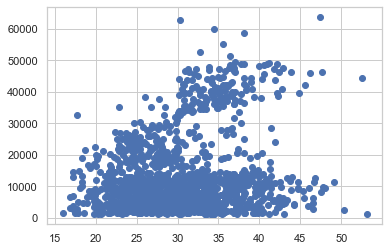

children


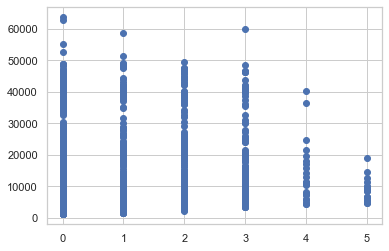

sex_male


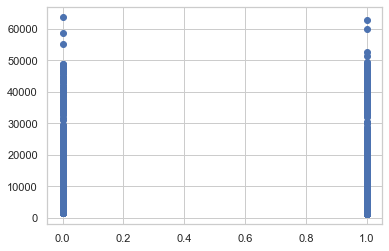

smoker_yes


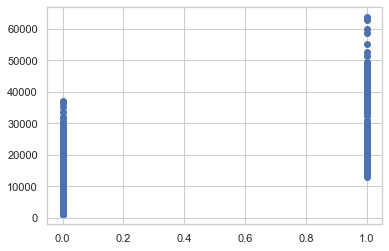

region_northwest


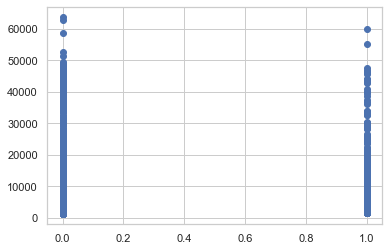

region_southeast


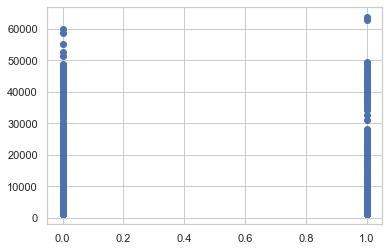

region_southwest


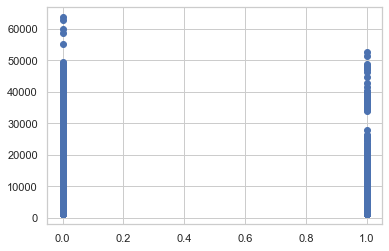

In [20]:
for col in X.columns:
    print(col)
    plt.scatter(X[col], y)
    plt.show()

## Regression Models

## Linear Regression

In [21]:
# Linear Regression
linear = LinearRegression().fit(X_train_scaled, y_train)
print('Model: Linear Regression')
print(f'Train Score: {linear.score(X_train_scaled, y_train)}\n')
print(f'Test Score: {linear.score(X_test_scaled, y_test)}\n')


Model: Linear Regression
Train Score: 0.739281571480966

Test Score: 0.7791047366684515



##  LASSO Regression

* LASSO regression, like linear regression, minimizes the sum of the squared errors.

* However, LASSO regression also adds a penalty factor.

* The penalty factor is the sum of the absolute values of the coefficients.

* This is also called L1 regularization.

### In LASSO regression, the coefficients of features that don't contribute predictive power can go to zero.

In [22]:
lasso = Lasso(max_iter=2000).fit(X_train_scaled, y_train)
print('Model: LASSO Regression')
print(f'Train Score: {lasso.score(X_train_scaled, y_train)}\n')
print(f'Test Score: {lasso.score(X_test_scaled, y_test)}\n')


Model: LASSO Regression
Train Score: 0.7392814648689311

Test Score: 0.7791052399870776



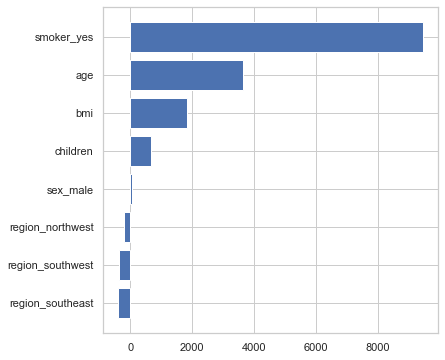

In [23]:
lasso_features = sorted(zip(X.columns, lasso.coef_), key = lambda x: x[1])
cols = [f[0] for f in lasso_features]
width = [f[1] for f in lasso_features]
fig, ax = plt.subplots(figsize=(6,6))
ax.barh(y=cols, width=width)

plt.show()

## Ridge Regression

* Ridge regression is similar to LASSO regression.

* Both Ridge regression and LASSO regression add a penalty factor.

* The penalty factor in Ridge regression is the sum of the squared values of the coefficients.

* This is called L2 regularization.

## In Ridge regression, the coefficients can't go to zero. But, this type of regression doesn't get as confused by collinear features, and the coefficients are more stable.

In [24]:
ridge = Ridge(alpha=100).fit(X_train_scaled, y_train)
print('Model: Ridge')
print(f'Train Score: {ridge.score(X_train_scaled, y_train)}\n')
print(f' Test Score: {ridge.score(X_test_scaled, y_test)}\n')


Model: Ridge
Train Score: 0.7329073976307304

 Test Score: 0.7708975348879511



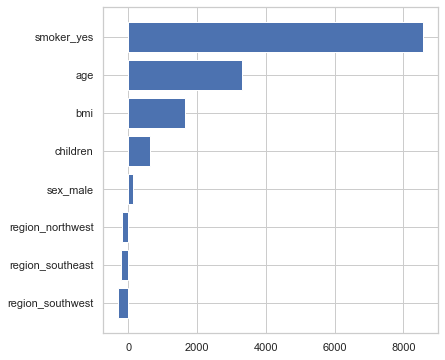

In [25]:
ridge_features = sorted(zip(X.columns, ridge.coef_), key = lambda x: x[1])
cols = [f[0] for f in ridge_features]
width = [f[1] for f in ridge_features]
fig, ax = plt.subplots(figsize=(6,6))
ax.barh(y=cols, width=width)

plt.show()

## Random Forest

In [26]:
Rfr = rfr()
Rfr.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [27]:
print('Model: Random Forest')
print(f'Train Score: {Rfr.score(X_train_scaled, y_train)}\n')
print(f'Test Score: {Rfr.score(X_test_scaled, y_test)}\n')

Model: Random Forest
Train Score: 0.9764202632327427

Test Score: 0.8347378541301677



## Feature Importance

Feature importance ranking


1.smoker_yes(0.608718)
2.bmi(0.215697)
3.age(0.135477)
4.children(0.021284)
5.sex_male(0.005706)
6.region_northwest(0.005161)
7.region_southeast(0.004023)
8.region_southwest(0.003933)


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

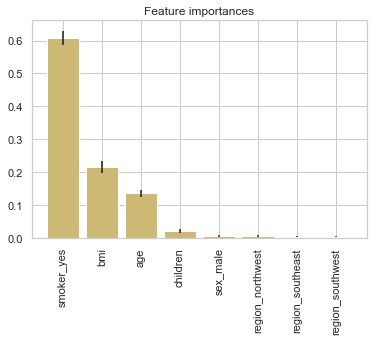

In [28]:
print('Feature importance ranking\n\n')
importances = Rfr.feature_importances_
std = np.std([tree.feature_importances_ for tree in Rfr.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = ['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest',
       'region_southeast', 'region_southwest']
importance_list = []
for f in range(X.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="y", yerr=std[indices], align="center")
plt.xticks(rotation=90)

In [29]:
selected_feature_list = ['smoker_yes','bmi','age']
X_sub = X[selected_feature_list]
X_sub_train, X_sub_test, y_train, y_test = train_test_split(X_sub, y, random_state=18)

In [30]:
#  Random Forest baseline model using default parameters, 
# training data is only included the selected important features.

Rfr_baseline=rfr().fit(X_sub_train, y_train)

print('Model: Random Forest_baseline model')
print(f'Train Score: {Rfr_baseline.score(X_sub_train, y_train)}\n')
print(f'Test Score: {Rfr_baseline.score(X_sub_test, y_test)}\n')

Model: Random Forest_baseline model
Train Score: 0.9689252882211665

Test Score: 0.8307222167954662



### Insight:
Model performance in test dataset is much worse than in train dataset, there is overfit problem.

In [31]:
search_grid={
    "n_estimators": [int(x) for x in np.linspace(start=10, stop=300, num=10)],
    "max_features": ["auto", "sqrt"],
    "max_depth": [int(x) for x in range(11)],
    "min_samples_split":[2, 5, 10],
    "min_samples_leaf":[1, 2, 4],
    "bootstrap": [True, False]
}
pprint(search_grid)

{'bootstrap': [True, False],
 'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 42, 74, 106, 138, 171, 203, 235, 267, 300]}


In [32]:
Rfr_opt = RandomizedSearchCV(
    estimator=rfr(),
    param_distributions=search_grid,
    cv=10,
    random_state=18,
)

In [33]:
Rfr_opt.fit(X_sub_train, y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8,
                                                      9, 10],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 42, 74, 106, 138,
                                                         171, 203, 235, 267,
                                                         300]},
                   random_state=18)

In [34]:
pprint(f"best parameters: {Rfr_opt.best_params_}")
pprint(f"best_estimator: {Rfr_opt.best_estimator_}")

("best parameters: {'n_estimators': 267, 'min_samples_split': 2, "
 "'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 3, 'bootstrap': "
 'True}')
('best_estimator: RandomForestRegressor(max_depth=3, min_samples_leaf=2, '
 'n_estimators=267)')


In [35]:
print('Model: Random Forest_baseline model')
print(f'Train Score: {Rfr_opt.score(X_sub_train, y_train)}\n')
print(f'Test Score: {Rfr_opt.score(X_sub_test, y_test)}\n')

Model: Random Forest_baseline model
Train Score: 0.8568160739898475

Test Score: 0.8714703630028118



## Prediction

In [36]:
y_test_pred = Rfr_opt.predict(X_sub_test)
##Comparing the actual output values with the predicted values
final_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
final_df.head(5)

,Actual,Predicted
381,42303.69215,45631.854755
38,39774.27630,41841.160076
197,8516.82900,10065.907606
14,39611.75770,38224.568037
94,47291.05500,45569.060695


## Save model for deployment

In [38]:
import pickle

In [43]:
from joblib import dump, load

In [39]:
saved_model=pickle.dumps(Rfr_opt)

In [44]:
dump(Rfr_opt, 'random_forest_model_in_use.joblib')

['random_forest_model_in_use.joblib']

In [45]:
clf = load('random_forest_model_in_use.joblib') 

In [66]:

user_info = pd.DataFrame(data = { "smoker_yes":[1],  "bmi":[36.670],"age":[35]})
user_info
clf.predict(user_info)[0]

41841.16007637787

In [47]:
X_sub_test.head()

,smoker_yes,bmi,age
381,1,30.685,55
38,1,36.670,35
197,0,28.600,45
14,1,42.130,27
94,1,31.300,64


In [61]:
clf.predict(X_sub_test)

array([45631.85475504, 41841.16007638, 10065.90760644, 38224.56803697,
       45569.06069454,  3778.4094015 , 41736.23061378, 12617.65122973,
       44582.88011411, 18207.57628327,  3778.4094015 , 25216.1882778 ,
       25497.6591299 ,  3883.99408866, 13119.5059444 , 12617.65122973,
       13119.5059444 , 18207.57628327,  5805.27891027, 18207.57628327,
       25466.65641003, 10984.82167289,  3883.99408866,  3778.4094015 ,
        3778.4094015 ,  3861.69064232, 18207.57628327,  6645.34256628,
        3883.99408866, 18207.57628327, 18207.57628327,  3778.4094015 ,
        3883.99408866,  5333.53862213, 37743.69167877,  3814.72762685,
       14519.21043419, 10795.15444955, 25216.1882778 ,  3814.72762685,
        3778.4094015 , 25466.65641003,  5594.5603047 , 25466.65641003,
        6602.55972796,  6645.34256628, 45498.77403915, 25466.65641003,
        6703.76816524,  3814.72762685,  6703.76816524, 25216.1882778 ,
        5805.27891027,  5794.96247472,  5709.4555055 , 10065.90760644,
      